In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import RectangleSelector
import topotoolbox as tt

# from ipywidgets import interact, IntSlider, Button, HBox, VBox
# from IPython.display import display, clear_output

In [31]:

data = tt.load_dem('perfectworld').z

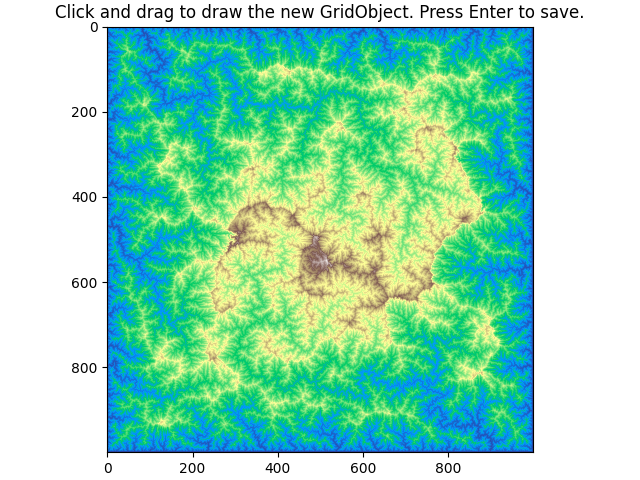

In [32]:
%matplotlib widget

def select_callback(eclick, erelease):
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    global selection_coords
    selection_coords = (x1, y1, x2, y2)

def on_key_press(event):
    if event.key == 'enter':
        x1, y1, x2, y2 = selection_coords
        # Convert coordinates to array indices
        i1, j1 = int(y1), int(x1)
        i2, j2 = int(y2), int(x2)
        # Ensure i1 < i2 and j1 < j2
        if i1 > i2:
            i1, i2 = i2, i1
        if j1 > j2:
            j1, j2 = j2, j1
        selected_region = data[i1:i2, j1:j2]
        global saved_region
        saved_region = selected_region

fig, ax = plt.subplots(layout='constrained')
ax.imshow(data, cmap='terrain')
ax.set_title("Click and drag to draw the new GridObject. Press Enter to save.")

# Create the rectangle selector
selector = RectangleSelector(
    ax, select_callback,
    useblit=True,
    button=[1],
    minspanx=5, minspany=5,
    spancoords='pixels',
    interactive=True)


fig.canvas.mpl_connect('key_press_event', on_key_press)
plt.show()

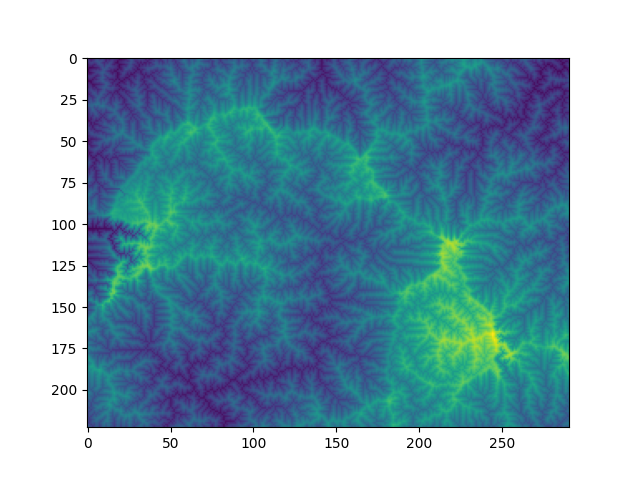

In [33]:
plt.close('all')
plt.imshow(saved_region)
plt.show()